In [2]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [26]:
mergeTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Merge/random/*.cali'))
radixTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Radix/random/*.cali'))
quickTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/random/*.cali'))

mergeTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Merge/random/*.cali'))
radixTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Radix/random/*.cali'))

IndexError: list index out of range

Clean up the merge data

In [4]:
MPIData = [mergeTKMPIRandom, radixTKMPIRandom, quickTKMPIRandom]
MPIDataClean = []

for i in range(len(MPIData)):
    GB = MPIData[i].groupby("InputSize")

    Ctk = th.Thicket.concat_thickets(
        thickets=list(GB.values()),
        headers=list(GB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    Ctk.dataframe = Ctk.dataframe.reset_index().drop(remove_list, axis=1)
    MPIDataClean.append(Ctk)

# mergeCUDAData = [mergeTKCUDARandom, radixTKCUDARandom]
# mergeCUDADataClean = []

# for i in range(len(mergeCUDAData)):
#     mergeGB = mergeCUDAData[i].groupby("InputSize")

#     mergeCtk = th.Thicket.concat_thickets(
#         thickets=list(mergeGB.values()),
#         headers=list(mergeGB.keys()),
#         axis="columns",
#         metadata_key="num_procs"
#     )

#     remove_list = [("node", "")]
#     values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
#     for val in values:
#         remove_list.append((val, "nid"))
#         remove_list.append((val, "spot.channel"))
#         remove_list.append((val, "Total time"))

#     mergeCtk.dataframe = mergeCtk.dataframe.reset_index().drop(remove_list, axis=1)
#     mergeCUDADataClean.append(mergeCtk)

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ba7593ff190>, 262144: <thicket.thicket.Thicket object at 0x2ba75943c4f0>, 1048576: <thicket.thicket.Thicket object at 0x2ba75943b520>, 4194304: <thicket.thicket.Thicket object at 0x2ba75907ed00>, 16777216: <thicket.thicket.Thicket object at 0x2ba759379c10>, 67108864: <thicket.thicket.Thicket object at 0x2ba759507f40>, 268435456: <thicket.thicket.Thicket object at 0x2ba758ea3c10>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ba759174a30>, 262144: <thicket.thicket.Thicket object at 0x2ba758f2b940>, 1048576: <thicket.thicket.Thicket object at 0x2ba759040490>, 4194304: <thicket.thicket.Thicket object at 0x2ba7590403d0>, 16777216: <thicket.thicket.Thicket object at 0x2ba759240ca0>, 67108864: <thicket.thicket.Thicket object at 0x2ba75932ecd0>, 268435456: <thicket.thicket.Thicket object at 0x2ba759047e20>}


Collect desired regions for plotting

In [6]:
# Data for main
mergeMPIRandomMain = MPIDataClean[0].dataframe.loc[MPIDataClean[0].dataframe['name'] == 'main']
radixMPIRandomMain = MPIDataClean[1].dataframe.loc[MPIDataClean[1].dataframe['name'] == 'main']
quickMPIRandomMain = MPIDataClean[2].dataframe.loc[MPIDataClean[2].dataframe['name'] == 'main']

# Data for comm
mergeMPIRandomComm = MPIDataClean[0].dataframe.loc[MPIDataClean[0].dataframe['name'] == 'comm']
radixMPIRandomComm = MPIDataClean[1].dataframe.loc[MPIDataClean[1].dataframe['name'] == 'comm']
quickMPIRandomComm = MPIDataClean[2].dataframe.loc[MPIDataClean[2].dataframe['name'] == 'comm']

# Data for comp
mergeMPIRandomComp = MPIDataClean[0].dataframe.loc[MPIDataClean[0].dataframe['name'] == 'comp_large']
radixMPIRandomCommLarge = MPIDataClean[1].dataframe.loc[MPIDataClean[1].dataframe['name'] == 'comm_large']
quickMPIRandomCommLarge = MPIDataClean[2].dataframe.loc[MPIDataClean[2].dataframe['name'] == 'comm_large']

algosMain = {'MergeMPIRandom': mergeMPIRandomMain, 'RadixMPIRandom': radixMPIRandomMain, 'QuickMPIRandom': quickMPIRandomMain}

algosComm = {'MergeMPIRandom': mergeMPIRandomComm, 'RadixMPIRandom': radixMPIRandomComm, 'QuickMPIRandom': quickMPIRandomComm}

algosComp = {'MergeMPIRandom': mergeMPIRandomComp, 'RadixMPIRandom': radixMPIRandomCommLarge, 'QuickMPIRandom': quickMPIRandomCommLarge}

# # Data for main
# mergeCUDARandomMain = mergeCUDADataClean[0].dataframe.loc[mergeCUDADataClean[0].dataframe['name'] == 'main']
# mergeCUDASortedMain = mergeCUDADataClean[1].dataframe.loc[mergeCUDADataClean[1].dataframe['name'] == 'main']
# mergeCUDAReverseMain = mergeCUDADataClean[2].dataframe.loc[mergeCUDADataClean[2].dataframe['name'] == 'main']
# mergeCUDAPerturbedMain = mergeCUDADataClean[3].dataframe.loc[mergeCUDADataClean[3].dataframe['name'] == 'main']

# # Data for comm
# mergeCUDARandomComm = mergeCUDADataClean[0].dataframe.loc[mergeCUDADataClean[0].dataframe['name'] == 'comm']
# mergeCUDASortedComm = mergeCUDADataClean[1].dataframe.loc[mergeCUDADataClean[1].dataframe['name'] == 'comm']
# mergeCUDAReverseComm = mergeCUDADataClean[2].dataframe.loc[mergeCUDADataClean[2].dataframe['name'] == 'comm']
# mergeCUDAPerturbedComm = mergeCUDADataClean[3].dataframe.loc[mergeCUDADataClean[3].dataframe['name'] == 'comm']

# # Data for comp
# mergeCUDARandomComp = mergeCUDADataClean[0].dataframe.loc[mergeCUDADataClean[0].dataframe['name'] == 'comp_large']
# mergeCUDASortedComp = mergeCUDADataClean[1].dataframe.loc[mergeCUDADataClean[1].dataframe['name'] == 'comp_large']
# mergeCUDAReverseComp = mergeCUDADataClean[2].dataframe.loc[mergeCUDADataClean[2].dataframe['name'] == 'comp_large']
# mergeCUDAPerturbedComp = mergeCUDADataClean[3].dataframe.loc[mergeCUDADataClean[3].dataframe['name'] == 'comp_large']

# algosMainCUDA = {'MergeCUDARandom': mergeCUDARandomMain, 'MergeCUDASorted': mergeCUDASortedMain, 'MergeCUDAReverse': mergeCUDAReverseMain,
#             'MergeCUDAPerturbed': mergeCUDAPerturbedMain}

# algosCommCUDA = {'MergeCUDARandom': mergeCUDARandomComm, 'MergeCUDASorted': mergeCUDASortedComm, 'MergeCUDAReverse': mergeCUDAReverseComm,
#             'MergeCUDAPerturbed': mergeCUDAPerturbedComm}

# algosCompCUDA = {'MergeCUDARandom': mergeCUDARandomComp, 'MergeCUDASorted': mergeCUDASortedComp, 'MergeCUDAReverse': mergeCUDAReverseComp,
#             'MergeCUDAPerturbed': mergeCUDAPerturbedComp}

# display(mergeCUDADataClean[0].dataframe)

Plot weak scaling

In [23]:
def plot_weak_scaling(algos, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    for key in algos.keys():
        algo = algos[key]
        xvals = [2, 8, 32, 128]
        sizePerXVal = [2**20, 2**22, 2**24, 2**26]
        yvals = []
        for idx, val in enumerate(sizePerXVal):
            correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
            times = correctNumProcs[val][time_type]
            if len(times) == 0:
                xvals.pop(idx)
                continue
            yvals.append(float(times.iloc[0]))

        ax.plot(xvals, yvals, label = key)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

def plot_weak_scaling_CUDA(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [64, 512, 1024]
    sizePerXVal = [2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

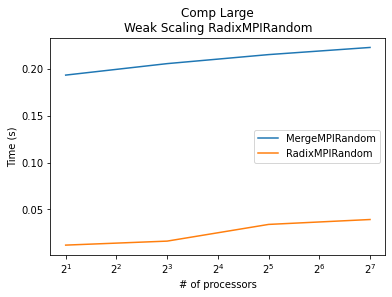

In [24]:
# for key in algosMain.keys():
#     plot_weak_scaling(key, algosMain[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of processors', 'Time (s)')

# for key in algosComm.keys():
#     plot_weak_scaling(key, algosComm[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of processors', 'Time (s)')

values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
plot_weak_scaling(algosComp, values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of processors', 'Time (s)')

CUDA

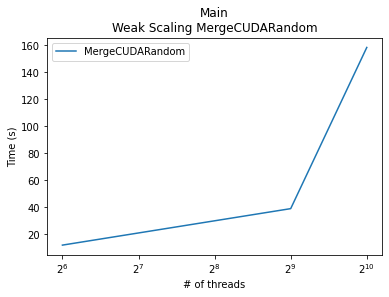

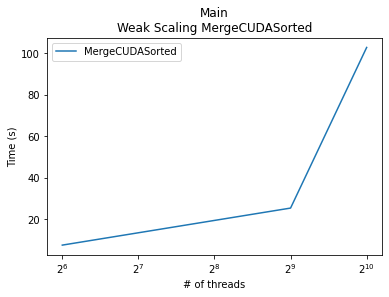

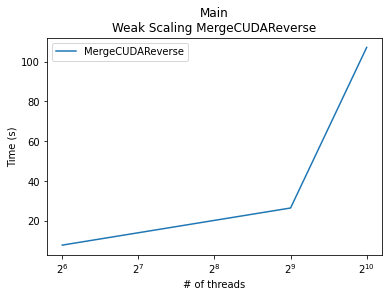

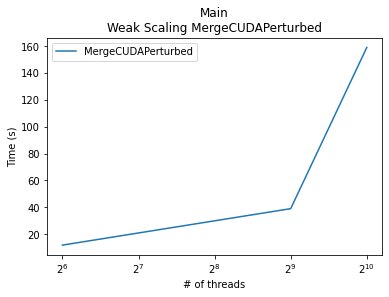

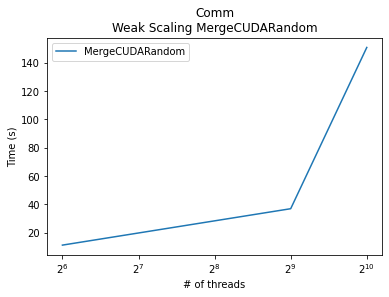

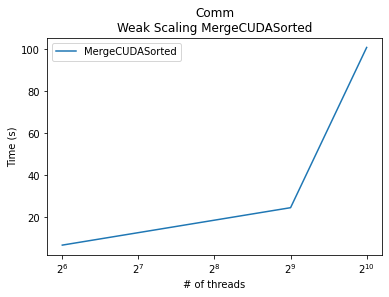

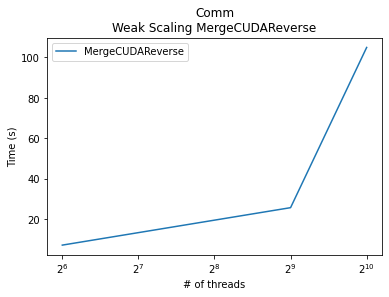

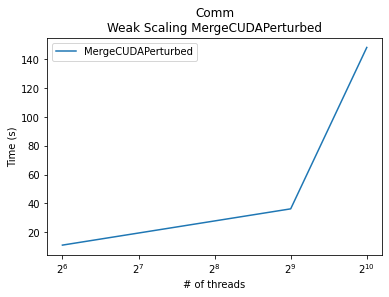

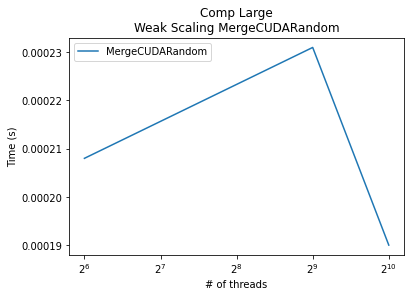

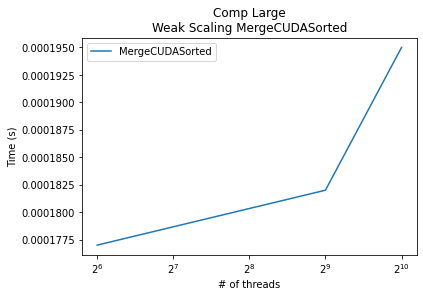

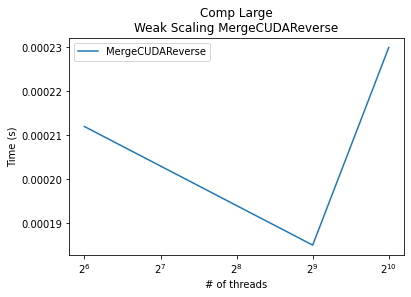

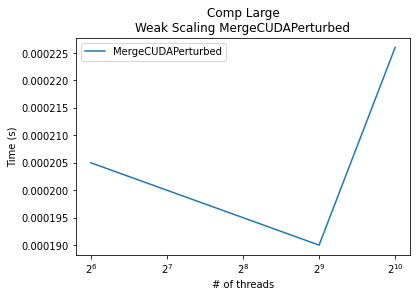

In [13]:
for key in algosMainCUDA.keys():
    plot_weak_scaling_CUDA(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCommCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCompCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of threads', 'Time (s)')